In [ ]:
from os.path import split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [ ]:
#Load the CSV files

train = pd.read_csv("/content/mnist/train.csv")
test  = pd.read_csv('/content/mnist/test.csv')

# Separate features and labels  from the training set
X = train.drop(columns=['label']).values
y = train['label'].values

# Prepare the test set
X_test =test.values

print('Train shape:', X.shape)
print('Test shape:', X_test.shape)

Train shape: (42000, 784)
Test shape: (28000, 784)


In [ ]:
# Normalize the data
X = X / 255
X_test = X_test / 255

#Reshape the data for CNN input
X = X.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

#One-hot encode the labels
y = to_categorical(y, num_classes=10)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=64, epochs=10, verbose=1)

Epoch 1/10
460/460 ━━━━━━━━━━━━━━━━━━━━ 50s 102ms/step - accuracy: 0.7549 - loss: 0.7526 - val_accuracy: 0.9716 - val_loss: 0.0887
Epoch 2/10
460/460 ━━━━━━━━━━━━━━━━━━━━ 70s 75ms/step - accuracy: 0.9561 - loss: 0.1504 - val_accuracy: 0.9797 - val_loss: 0.0630
Epoch 3/10
460/460 ━━━━━━━━━━━━━━━━━━━━ 60s 116ms/step - accuracy: 0.9692 - loss: 0.1062 - val_accuracy: 0.9863 - val_loss: 0.0443
Epoch 4/10
460/460 ━━━━━━━━━━━━━━━━━━━━ 73s 97ms/step - accuracy: 0.9767 - loss: 0.0819 - val_accuracy: 0.9879 - val_loss: 0.0387
Epoch 5/10
460/460 ━━━━━━━━━━━━━━━━━━━━ 69s 68ms/step - accuracy: 0.9785 - loss: 0.0699 - val_accuracy: 0.9889 - val_loss: 0.0342
Epoch 6/10
460/460 ━━━━━━━━━━━━━━━━━━━━ 41s 68ms/step - accuracy: 0.9835 - loss: 0.0564 - val_accuracy: 0.9882 - val_loss: 0.0383
Epoch 7/10
460/460 ━━━━━━━━━━━━━━━━━━━━ 44s 73ms/step - accuracy: 0.9827 - loss: 0.0573 - val_accuracy: 0.9905 - val_loss: 0.0313
Epoch 8/10
460/460 ━━━━━━━━━━━━━━━━━━━━ 40s 71ms/step - accuracy: 0.9840 - loss: 0.0497 

394/394 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9912 - loss: 0.0309
Validation accuracy: 0.9911110997200012


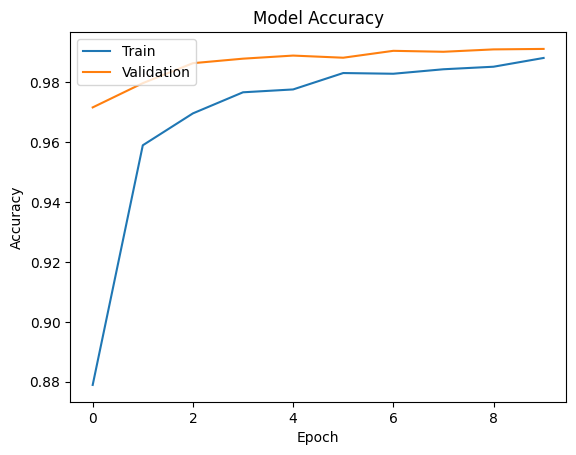

In [ ]:
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f'Validation accuracy: {val_acc}')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

394/394 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step


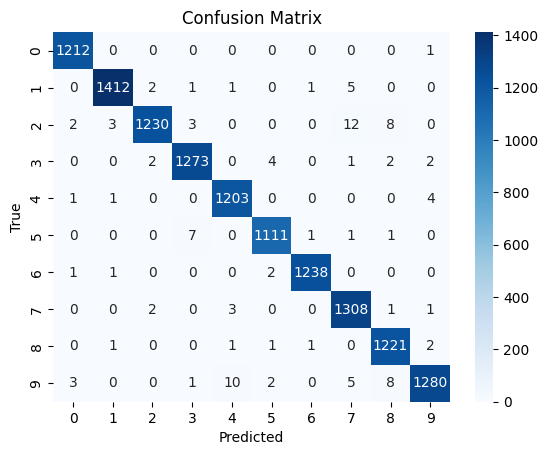

In [ ]:
y_pred  = np.argmax(model.predict(X_val), axis=1)
y_true = np.argmax(y_val, axis=1)

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
predictions = np.argmax(model.predict(X_test), axis=1) # Corrected function name to argmax

submission = pd.DataFrame({'ImageId': range(1, len(predictions) + 1), 'Label': predictions})
submission.to_csv('submission07.csv', index=False)

875/875 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2
)

datagen.fit(X_train)

In [ ]:
history =  model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    validation_data=(X_val, y_val),
    epochs=10,
    verbose=1
)

Epoch 1/10
  1/460 ━━━━━━━━━━━━━━━━━━━━ 7:53 1s/step - accuracy: 0.8281 - loss: 0.7582

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


460/460 ━━━━━━━━━━━━━━━━━━━━ 42s 90ms/step - accuracy: 0.9035 - loss: 0.3266 - val_accuracy: 0.9879 - val_loss: 0.0362
Epoch 2/10
460/460 ━━━━━━━━━━━━━━━━━━━━ 42s 90ms/step - accuracy: 0.9452 - loss: 0.1846 - val_accuracy: 0.9893 - val_loss: 0.0327
Epoch 3/10
460/460 ━━━━━━━━━━━━━━━━━━━━ 40s 86ms/step - accuracy: 0.9562 - loss: 0.1466 - val_accuracy: 0.9908 - val_loss: 0.0292
Epoch 4/10
460/460 ━━━━━━━━━━━━━━━━━━━━ 43s 90ms/step - accuracy: 0.9618 - loss: 0.1317 - val_accuracy: 0.9912 - val_loss: 0.0280
Epoch 5/10
460/460 ━━━━━━━━━━━━━━━━━━━━ 41s 89ms/step - accuracy: 0.9659 - loss: 0.1172 - val_accuracy: 0.9910 - val_loss: 0.0267
Epoch 6/10
460/460 ━━━━━━━━━━━━━━━━━━━━ 39s 84ms/step - accuracy: 0.9647 - loss: 0.1171 - val_accuracy: 0.9917 - val_loss: 0.0249
Epoch 7/10
460/460 ━━━━━━━━━━━━━━━━━━━━ 42s 90ms/step - accuracy: 0.9660 - loss: 0.1119 - val_accuracy: 0.9924 - val_loss: 0.0224
Epoch 8/10
460/460 ━━━━━━━━━━━━━━━━━━━━ 81s 88ms/step - accuracy: 0.9696 - loss: 0.1027 - val_accurac

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
